In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from datasets import load_dataset


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:

base_accs = (np.load("llama7B_GSM8k_test_answer_types_all100.npy")==0).mean(axis=-1)
# base_accs = np.log(base_accs+0.01)


In [25]:
hard25_accs = np.load("ckpts/sft_gsm8k_llama7B_subsample2_hard25/checkpoint_04000/hf_model/test_answer_types_100.npy")
hard25_accs = (hard25_accs==0).mean(-1)
# hard25_accs = np.log(hard25_accs+0.01)

easy75_accs = np.load("ckpts/sft_gsm8k_llama7B_subsample2_easy75/checkpoint_04000/hf_model/test_answer_types_100.npy")
easy75_accs = (easy75_accs==0).mean(-1)
# easy75_accs = np.log(easy75_accs+0.01)


In [18]:
def get_bin_mean(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    bin_stds = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
        bin_stds.append(np.std(y_axis[idxs]))
    return np.array(bin_avgs), np.array(bin_stds)

<ErrorbarContainer object of 3 artists>

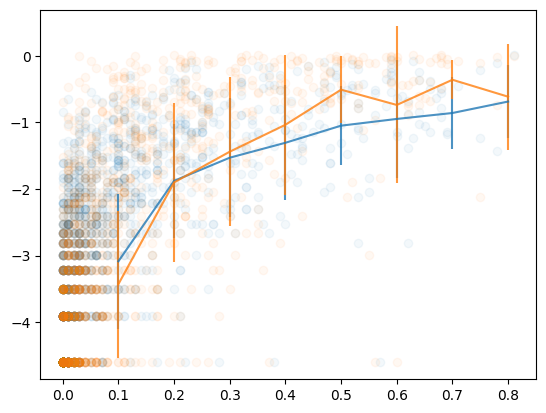

In [21]:
plt.scatter(base_accs, hard25_accs, alpha=0.05)
plt.scatter(base_accs, easy75_accs, alpha=0.05)

bins = np.arange(0, 0.9, 0.1)
# bins = np.arange(-5, 1, 1)

# plt.plot([0, 1], [0, 1], color="black")

hard25_means, hard25_stds = get_bin_mean(base_accs, hard25_accs, bins)
plt.errorbar(bins[:-1]+0.1 ,hard25_means,  hard25_stds, alpha=0.8)

easy75_means, easy75_stds = get_bin_mean(base_accs, easy75_accs, bins)
plt.errorbar(bins[:-1]+0.1 ,easy75_means,  easy75_stds, alpha=0.8)


<ErrorbarContainer object of 3 artists>

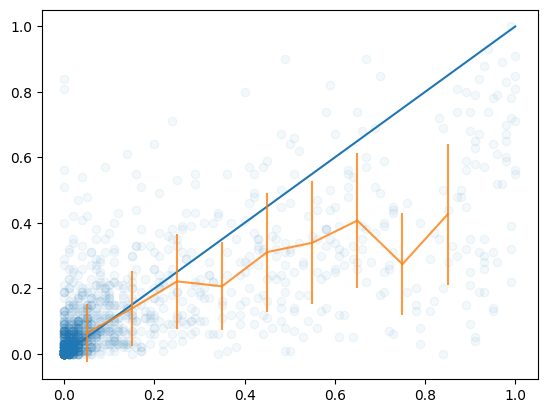

In [29]:
plt.scatter(easy75_accs, hard25_accs, alpha=0.05)
# plt.plot([-5, 0], [-5, 0])
plt.plot([ 0, 1], [0, 1])

bins = np.arange(0, 1, .1)
hard25_means, hard25_stds = get_bin_mean(easy75_accs, hard25_accs, bins)
plt.errorbar(bins[:-1]+0.05 ,hard25_means,  hard25_stds, alpha=0.8)


In [16]:
bins

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [44]:
a = (np.load("llama7B_GSM8k_train_answer_types_all100.npy")[:, :50]==0).mean(axis=-1)
b = (np.load("llama7B_GSM8k_train_answer_types_all100.npy")[:, 50:]==0).mean(axis=-1)


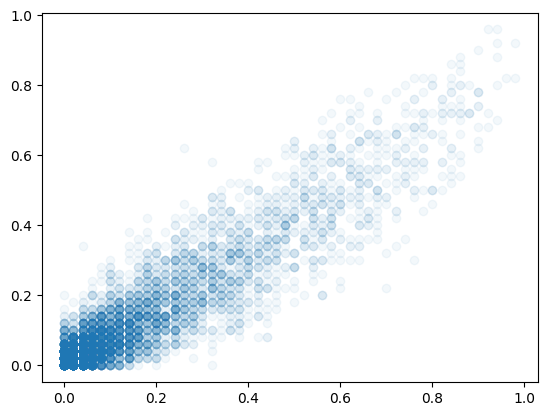

In [45]:
plt.scatter(a, b, alpha=0.05)

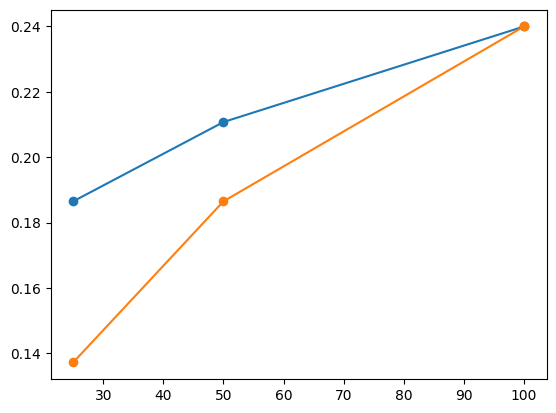

In [50]:
plt.plot([25, 50, 100], [0.1865049279757392, 0.21076573161485973, 0.24], "o-")
plt.plot([25, 50, 100], [0.1372251705837756,0.1865049279757392, 0.24], "o-")